In [1]:
import pandas as pd

df = pd.read_json('articles_with_sentiment.json')
df

,title,text,href,date,text_size,title_sentiment
1,3M Co. stock outperforms market on strong trad...,Shares of 3M Co. inched 0.92% higher to $199.2...,https://www.marketwatch.com/story/3m-co-stock-...,2021-08-10,137,"[{'label': 'negative', 'score': 0.7560104728}]"
2,"3M Co. stock falls Monday, underperforms market","Shares of 3M Co. shed 0.35% to $197.43 Monday,...",https://www.marketwatch.com/story/3m-co-stock-...,2021-08-09,144,"[{'label': 'negative', 'score': 0.9674504399}]"
3,"3M Co. stock rises Friday, still underperforms...",Shares of 3M Co. inched 0.17% higher to $198.1...,https://www.marketwatch.com/story/3m-co-stock-...,2021-08-06,148,"[{'label': 'positive', 'score': 0.5620661974}]"
4,"3M Co. stock rises Thursday, still underperfor...",Shares of 3M Co. inched 0.14% higher to $197.8...,https://www.marketwatch.com/story/3m-co-stock-...,2021-08-05,137,"[{'label': 'negative', 'score': 0.4998148978}]"
5,3M Co. stock underperforms Wednesday when comp...,Shares of 3M Co. slid 1.74% to $197.53 Wednesd...,https://www.marketwatch.com/story/3m-co-stock-...,2021-08-04,133,"[{'label': 'negative', 'score': 0.9593439698}]"
...,...,...,...,...,...,...
300731,Zoetis shares jump 2.9% premarket after earnin...,Zoetis Inc. shares rose 2.9% in premarket trad...,https://www.marketwatch.com/story/zoetis-share...,2019-11-07,197,"[{'label': 'positive', 'score': 0.8530068398}]"
300732,Zoetis names Kristin Peck as CEO effective Jan...,Zoetis Inc. said Thursday it has named Kristin...,https://www.marketwatch.com/story/zoetis-names...,2019-10-03,80,"[{'label': 'neutral', 'score': 0.9217759371}]"
300733,Zoetis Stock Is Up as Pet Products Lift Revenue,Shares of were up about 7% early Tuesday after...,https://www.marketwatch.com/articles/zoetis-st...,2019-08-06,215,"[{'label': 'positive', 'score': 0.9524856806}]"
300738,Zoetis to buy veterinary diagnostics company A...,Zoetis Inc. announced Tuesday a deal to buy ve...,https://www.marketwatch.com/story/zoetis-to-bu...,2018-05-16,154,"[{'label': 'neutral', 'score': 0.8462707996000..."


In [2]:
df.dtypes

title                      object
text                       object
href                       object
date               datetime64[ns]
text_size                   int64
title_sentiment            object
dtype: object

In [17]:
df['sentiment_score'] = df['title_sentiment'].apply(lambda x: x[0]['score'] if x[0]['label']=='positive' 
                                                    else 0 if x[0]['label']=='neutral' else -x[0]['score'])

In [18]:
df.sample(5)

,title,text,href,date,text_size,title_sentiment,sentiment_score
92969,CBRE Group Inc. Cl A stock outperforms market ...,Shares of CBRE Group Inc. Cl A advanced 1.39% ...,https://www.marketwatch.com/story/cbre-group-i...,2021-02-12,153,"[{'label': 'negative', 'score': 0.5995228887}]",-0.599523
148261,Ford sees $180 million cost to correct suspens...,Ford Motor Co. disclosed Wednesday that it est...,https://www.marketwatch.com/story/ford-sees-18...,2019-06-12,136,"[{'label': 'neutral', 'score': 0.6377885938}]",0.000000
255775,Qualcomm stock rises following earnings beat,Qualcomm Inc. shares rose in the extended sess...,https://www.marketwatch.com/story/qualcomm-sto...,2018-11-07,133,"[{'label': 'positive', 'score': 0.7150042653}]",0.715004
164244,Waters Corp. stock outperforms market on stron...,Shares of Waters Corp. rallied 8.37% to $291.3...,https://www.marketwatch.com/story/waters-corp-...,2021-02-02,136,"[{'label': 'positive', 'score': 0.7523343563}]",0.752334
94501,"CDW Corp. stock remains steady Tuesday, underp...","Shares of CDW Corp. were unchanged Tuesday, on...",https://www.marketwatch.com/story/cdw-corp-sto...,2020-12-08,124,"[{'label': 'negative', 'score': 0.8193141818}]",-0.819314


<AxesSubplot:>

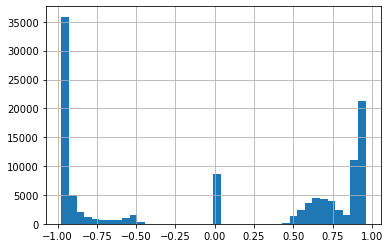

In [20]:
df['sentiment_score'].hist(bins=40)

In [21]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,23.878779,23.886487,23.493389,23.493389,31929700,0.0,0
2010-01-04,23.601300,23.971274,23.578176,23.855658,38409100,0.0,0
2010-01-05,23.778582,23.971277,23.616718,23.863367,49749600,0.0,0
2010-01-06,23.801708,23.955864,23.524228,23.716923,58182400,0.0,0
2010-01-07,23.609006,23.662961,23.269863,23.470266,50559700,0.0,0
...,...,...,...,...,...,...,...
2020-01-17,163.948902,163.997868,162.000155,163.635544,34371700,0.0,0
2020-01-21,163.224219,164.702922,162.979403,163.047958,29517200,0.0,0
2020-01-22,163.929308,164.017453,162.244967,162.264557,24138800,0.0,0


In [22]:
tickers = pd.read_json('data/snp500.json')
tickers.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,Articles,Populated
0,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999,664,664
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201,1934,1607,1607
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932,400,400
3,AAPL,Apple,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,9088,9088
4,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),1138,1138


In [28]:
symbols = ''
for row in tickers['Symbol']:
    symbols += row + ' '
symbols = symbols[:-1]
symbols

'A AAL AAP AAPL ABBV ABC ABMD ABT ACN ADBE ADI ADM ADP ADSK AEE AEP AES AFL AIG AIZ AJG AKAM ALB ALGN ALK ALL ALLE AMAT AMCR AMD AME AMGN AMP AMT AMZN ANET ANSS ANTM AON AOS APA APD APH APTV ARE ATO ATVI AVB AVGO AVY AWK AXP AZO BA BAC BAX BBWI BBY BDX BEN BF.B BIIB BIO BK BKNG BKR BLK BLL BMY BR BRK.B BSX BWA BXP C CAG CAH CARR CAT CB CBOE CBRE CCI CCL CDNS CDW CE CERN CF CFG CHD CHRW CHTR CI CINF CL CLX CMA CMCSA CME CMG CMI CMS CNC CNP COF COG COO COP COST CPB CPRT CRL CRM CSCO CSX CTAS CTLT CTSH CTVA CTXS CVS CVX CZR D DAL DD DE DFS DG DGX DHI DHR DIS DISCA DISCK DISH DLR DLTR DOV DOW DPZ DRE DRI DTE DUK DVA DVN DXC DXCM EA EBAY ECL ED EFX EIX EL EMN EMR ENPH EOG EQIX EQR ES ESS ETN ETR ETSY EVRG EW EXC EXPD EXPE EXR F FANG FAST FB FBHS FCX FDX FE FFIV FIS FISV FITB FLT FMC FOX FOXA FRC FRT FTNT FTV GD GE GILD GIS GL GLW GM GNRC GOOG GOOGL GPC GPN GPS GRMN GS GWW HAL HAS HBAN HBI HCA HD HES HIG HII HLT HOLX HON HPE HPQ HRL HSIC HST HSY HUM HWM IBM ICE IDXX IEX IFF ILMN INCY INFO IN

In [29]:
#get data on this ticker
tickerData = yf.Ticker(symbols)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2018-1-1', end='2021-08-10')

#see your data
tickerDf

- A AAL AAP AAPL ABBV ABC ABMD ABT ACN ADBE ADI ADM ADP ADSK AEE AEP AES AFL AIG AIZ AJG AKAM ALB ALGN ALK ALL ALLE AMAT AMCR AMD AME AMGN AMP AMT AMZN ANET ANSS ANTM AON AOS APA APD APH APTV ARE ATO ATVI AVB AVGO AVY AWK AXP AZO BA BAC BAX BBWI BBY BDX BEN BF.B BIIB BIO BK BKNG BKR BLK BLL BMY BR BRK.B BSX BWA BXP C CAG CAH CARR CAT CB CBOE CBRE CCI CCL CDNS CDW CE CERN CF CFG CHD CHRW CHTR CI CINF CL CLX CMA CMCSA CME CMG CMI CMS CNC CNP COF COG COO COP COST CPB CPRT CRL CRM CSCO CSX CTAS CTLT CTSH CTVA CTXS CVS CVX CZR D DAL DD DE DFS DG DGX DHI DHR DIS DISCA DISCK DISH DLR DLTR DOV DOW DPZ DRE DRI DTE DUK DVA DVN DXC DXCM EA EBAY ECL ED EFX EIX EL EMN EMR ENPH EOG EQIX EQR ES ESS ETN ETR ETSY EVRG EW EXC EXPD EXPE EXR F FANG FAST FB FBHS FCX FDX FE FFIV FIS FISV FITB FLT FMC FOX FOXA FRC FRT FTNT FTV GD GE GILD GIS GL GLW GM GNRC GOOG GOOGL GPC GPN GPS GRMN GS GWW HAL HAS HBAN HBI HCA HD HES HIG HII HLT HOLX HON HPE HPQ HRL HSIC HST HSY HUM HWM IBM ICE IDXX IEX IFF ILMN INCY INFO I

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [30]:
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")
data

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2017-01-03  27.297693  206.147537  29.037500  225.240005  29.082500   
2017-01-04  27.267136  207.373978  29.004999  226.580002  29.127501   
2017-01-05  27.405802  207.209198  29.152500  226.399994  29.215000   
2017-01-06  27.711332  207.950577  29.477501  227.210007  29.540001   
2017-01-09  27.965149  207.264145  29.747499  226.460007  29.857500   
...               ...         ...        ...         ...        ...   
2017-04-24  33.904785  218.010635  35.910000  237.169998  35.987499   
2017-04-25  34.114853  219.279160  36.132500  238.550003  36.224998   
2017-04-26  33.914223  219.141235  35.919998  238.399994  36.150002   
2017-04-27  33.940189  219.325119  35.947498  238.600006  36.040001   
2017-04-28  33.907150  218.847092  35.912498  238.080002  36.075001   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2017-01-03  225.830002  28.690001  223.880005  28.950001  225.039993   
2017-01-04  226.750000  28.937500  225.610001  28.962500  225.619995   
2017-01-05  226.580002  28.952499  225.479996  28.980000  226.270004   
2017-01-06  227.750000  29.117500  225.899994  29.195000  226.529999   
2017-01-09  227.070007  29.485001  226.419998  29.487499  226.910004   
...                ...        ...         ...        ...         ...   
2017-04-24  237.410004  35.794998  234.559998  35.875000  237.179993   
2017-04-25  238.949997  35.967499  237.809998  35.977501  237.910004   
2017-04-26  239.529999  35.845001  238.350006  36.117500  238.509995   
2017-04-27  238.949997  35.827499  237.979996  35.980000  238.770004   
2017-04-28  238.929993  35.817501  237.929993  36.022499  238.899994   

               Volume             
                 AAPL        SPY  
Date                              
2017-01-03  115127600   91366500  
2017-01-04   84472400   78744400  
2017-01-05   88774400   78379000  
2017-01-06  127007600   71559900  
2017-01-09  134247600   46939700  
...               ...        ...  
2017-04-24   68537200  119209900  
2017-04-25   75486000   76698300  
2017-04-26   80164800   84702500  
2017-04-27   56985200   57410300  
2017-04-28   83441600   63532800  

[81 rows x 12 columns]

In [36]:
data = yf.download(symbols, start="2018-01-01", end="2021-08-10")
data

[*********************100%***********************]  502 of 502 completed

5 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- COG: No data found, symbol may be delisted
- MXIM: No data found, symbol may be delisted
- KSU: No data found, symbol may be delisted


Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2018-01-02   65.523422  51.647564  103.325127   41.135750   80.227058   
2018-01-03   67.190582  51.014023  104.260101   41.128590   81.482521   
2018-01-04   66.686554  51.335670  108.107162   41.319633   81.017815   
2018-01-05   67.752769  51.316177  109.256416   41.790070   82.428185   
2018-01-08   67.898155  50.809341  108.487015   41.634853   81.107498   
...                ...        ...         ...         ...         ...   
2021-08-03  153.466522  19.950001  213.459076  146.738174  113.677917   
2021-08-04  153.875473  19.450001  207.780701  146.329895  112.533806   
2021-08-05  154.643494  20.910000  204.480713  146.439423  112.572922   
2021-08-06  155.301819  21.020000  203.866302  145.741333  111.917740   
2021-08-09  156.139664  20.559999  202.677124  145.691467  111.536362   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2018-01-02   87.474403  192.490005   54.864082  144.704468  177.699997  ...   
2018-01-03   87.799957  195.820007   54.985394  145.372360  181.039993  ...   
2018-01-04   87.604614  199.250000   54.892067  147.093674  183.220001  ...   
2018-01-05   88.665016  202.320007   55.050724  148.307007  185.339996  ...   
2018-01-08   90.134712  207.800003   54.892067  149.492203  185.039993  ...   
...                ...         ...         ...         ...         ...  ...   
2021-08-03  122.406349  326.519989  121.222725  316.755920  621.280029  ...   
2021-08-04  124.226959  331.200012  120.676773  315.015625  625.679993  ...   
2021-08-05  120.605522  348.859985  121.312065  318.536011  632.080017  ...   
2021-08-06  119.368698  345.880005  121.272354  320.047607  631.380005  ...   
2021-08-09  118.963020  346.649994  122.255089  317.750397  629.219971  ...   

             Volume                                                          \
                XEL      XLNX       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                          
2018-01-02  2443400   2579934  11469300  1622300   877800  1747800  1818259   
2018-01-03  4114900   2453316  13957700  1533300   778800  2554900  1368664   
2018-01-04  2807000   3346522  10863000  1052400   796500  1971200  1105396   
2018-01-05  3728000   5683466  11047600  1329000   666800  1927100  1095302   
2018-01-08  3837600   2483233  10927100  1188500   554700  1599400  1286985   
...             ...       ...       ...      ...      ...      ...      ...   
2021-08-03  1812800   5820396  18208200  1915100  1325900  1509200  4462269   
2021-08-04  2686400  10816676  20868300  2339800   954400  1163300  2456653   
2021-08-05  2025700   5893159  15180200  5220000   698200  1109200  1786432   
2021-08-06  2077300   3473204  14880200  1743000   763400  1211400  1653974   
2021-08-09  1415100   3875268  17828200  1845200   516400   950800  1766553   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2018-01-02  310600  2387100  2135600  
2018-01-03  253000  1575700  2328200  
2018-01-04  435200  3309200  2534000  
2018-01-05  301800  1212200  2166100  
2018-01-08  218600  1697700  3631400  
...            ...      ...      ...  
2021-08-03  446400   938600  2915500  
2021-08-04  321700  1059500  1824800  
2021-08-05  248300  1074900  2149200  
2021-08-06  205700  1641200  1282600  
2021-08-09  128800  1327500  1238000  

[907 rows x 3012 columns]

In [37]:
data.to_json('stock_prices.json')

In [40]:
df = pd.read_json('stock_prices.json')

In [42]:
df.head()

,"('Adj Close', 'A')","('Adj Close', 'AAL')","('Adj Close', 'AAP')","('Adj Close', 'AAPL')","('Adj Close', 'ABBV')","('Adj Close', 'ABC')","('Adj Close', 'ABMD')","('Adj Close', 'ABT')","('Adj Close', 'ACN')","('Adj Close', 'ADBE')",...,"('Volume', 'XEL')","('Volume', 'XLNX')","('Volume', 'XOM')","('Volume', 'XRAY')","('Volume', 'XYL')","('Volume', 'YUM')","('Volume', 'ZBH')","('Volume', 'ZBRA')","('Volume', 'ZION')","('Volume', 'ZTS')"
2018-01-02,65.523422,51.647564,103.325127,41.135750,80.227058,87.474403,192.490005,54.864082,144.704468,177.699997,...,2443400,2579934,11469300,1622300,877800,1747800,1818259,310600,2387100,2135600
2018-01-03,67.190582,51.014023,104.260101,41.128590,81.482521,87.799957,195.820007,54.985394,145.372360,181.039993,...,4114900,2453316,13957700,1533300,778800,2554900,1368664,253000,1575700,2328200
2018-01-04,66.686554,51.335670,108.107162,41.319633,81.017815,87.604614,199.250000,54.892067,147.093674,183.220001,...,2807000,3346522,10863000,1052400,796500,1971200,1105396,435200,3309200,2534000
2018-01-05,67.752769,51.316177,109.256416,41.790070,82.428185,88.665016,202.320007,55.050724,148.307007,185.339996,...,3728000,5683466,11047600,1329000,666800,1927100,1095302,301800,1212200,2166100
2018-01-08,67.898155,50.809341,108.487015,41.634853,81.107498,90.134712,207.800003,54.892067,149.492203,185.039993,...,3837600,2483233,10927100,1188500,554700,1599400,1286985,218600,1697700,3631400


In [59]:
ast.literal_eval(df.columns.values[0])

('Adj Close', 'A')

In [53]:
import ast

In [62]:
high_level = set()
low_level = set()

for item in df.columns.values:
    a, b = ast.literal_eval(item)
    high_level.add(a)
    low_level.add(b)

In [66]:
indices = []

for item in df.columns.values:
    indices.append(ast.literal_eval(item))

In [69]:
df.columns = pd.MultiIndex.from_tuples(indices)
df

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
2018-01-02   65.523422  51.647564  103.325127   41.135750   80.227058   
2018-01-03   67.190582  51.014023  104.260101   41.128590   81.482521   
2018-01-04   66.686554  51.335670  108.107162   41.319633   81.017815   
2018-01-05   67.752769  51.316177  109.256416   41.790070   82.428185   
2018-01-08   67.898155  50.809341  108.487015   41.634853   81.107498   
...                ...        ...         ...         ...         ...   
2021-08-03  153.466522  19.950001  213.459076  146.738174  113.677917   
2021-08-04  153.875473  19.450001  207.780701  146.329895  112.533806   
2021-08-05  154.643494  20.910000  204.480713  146.439423  112.572922   
2021-08-06  155.301819  21.020000  203.866302  145.741333  111.917740   
2021-08-09  156.139664  20.559999  202.677124  145.691467  111.536362   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
2018-01-02   87.474403  192.490005   54.864082  144.704468  177.699997  ...   
2018-01-03   87.799957  195.820007   54.985394  145.372360  181.039993  ...   
2018-01-04   87.604614  199.250000   54.892067  147.093674  183.220001  ...   
2018-01-05   88.665016  202.320007   55.050724  148.307007  185.339996  ...   
2018-01-08   90.134712  207.800003   54.892067  149.492203  185.039993  ...   
...                ...         ...         ...         ...         ...  ...   
2021-08-03  122.406349  326.519989  121.222725  316.755920  621.280029  ...   
2021-08-04  124.226959  331.200012  120.676773  315.015625  625.679993  ...   
2021-08-05  120.605522  348.859985  121.312065  318.536011  632.080017  ...   
2021-08-06  119.368698  345.880005  121.272354  320.047607  631.380005  ...   
2021-08-09  118.963020  346.649994  122.255089  317.750397  629.219971  ...   

             Volume                                                          \
                XEL      XLNX       XOM     XRAY      XYL      YUM      ZBH   
2018-01-02  2443400   2579934  11469300  1622300   877800  1747800  1818259   
2018-01-03  4114900   2453316  13957700  1533300   778800  2554900  1368664   
2018-01-04  2807000   3346522  10863000  1052400   796500  1971200  1105396   
2018-01-05  3728000   5683466  11047600  1329000   666800  1927100  1095302   
2018-01-08  3837600   2483233  10927100  1188500   554700  1599400  1286985   
...             ...       ...       ...      ...      ...      ...      ...   
2021-08-03  1812800   5820396  18208200  1915100  1325900  1509200  4462269   
2021-08-04  2686400  10816676  20868300  2339800   954400  1163300  2456653   
2021-08-05  2025700   5893159  15180200  5220000   698200  1109200  1786432   
2021-08-06  2077300   3473204  14880200  1743000   763400  1211400  1653974   
2021-08-09  1415100   3875268  17828200  1845200   516400   950800  1766553   

                                      
              ZBRA     ZION      ZTS  
2018-01-02  310600  2387100  2135600  
2018-01-03  253000  1575700  2328200  
2018-01-04  435200  3309200  2534000  
2018-01-05  301800  1212200  2166100  
2018-01-08  218600  1697700  3631400  
...            ...      ...      ...  
2021-08-03  446400   938600  2915500  
2021-08-04  321700  1059500  1824800  
2021-08-05  248300  1074900  2149200  
2021-08-06  205700  1641200  1282600  
2021-08-09  128800  1327500  1238000  

[907 rows x 3012 columns]